In [4]:
import os
import scipy
import numpy as np  
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Definición de las variables:
#  l= longitudes del péndulo l 
# err_l = error de la longitud del péndulo
# t = tiempo de 10 oscilaciones
# t_prom = tiempo promedio de 10 oscilaciones
# err_t = error del tiempo de 10 oscilaciones
# T = periodo de oscilación
# err_T = error del periodo de oscilación
# a = pendiente de la recta ajustada
# err_a = error de la pendiente de la recta ajustada
# g_exp = aceleración de la gravedad experimental ajustada
# err_g_exp = error de la aceleración de la gravedad experimental ajustada

#Cargar los datos
datos = np.load('C:\\Users\\iblra\\FISCOMPU2425\\datos.npy')

def longitud(datos):
    l = datos[:,0] # Selecciona todas las filas de la primera columna
    err_l = datos[:,1] # Selecciona todas las filas de la segunda columna
    return l, err_l

def t_promedio(datos):
    t = datos[:,2:] # Selecciona todas las filas desde la tercera a la última columna
    t_prom = np.mean(t, axis=1)  # Calcula el tiempo promedio (en cada fila)
    err_t = np.std(t, axis=1)/np.sqrt(10) # Calcula el error de tipo A del tiempo promedio
    return t_prom, err_t

def periodo(t_prom, err_t):
    T = t_prom/10 # Calcula el periodo de oscilación
    err_T = err_t/10 # Calcula el error del periodo de oscilación
    return T, err_T
#Representación gráfica de los datos
def grafica_datos(l, err_l, T, err_T):
    plt.rcParams['text.usetex'] = True
    plt.errorbar(l, T, xerr=err_l, yerr=err_T, fmt='o', markersize= 2, label='Datos', color='green')
    plt.xlabel(r'$l$ $(m)$')
    plt.ylabel(r'$T$ $(s)$')
    plt.title(r'\textbf{Periodo del péndulo vs longitud}')
    plt.legend()
    plt.show()

#Realización ajuste lineal del periodo y la raiz cuadrada de la longitud
def funcion_ajuste(x, a):
    return a*x

def ajuste_datos(x, y, err_x, err_y):
    parametros, covarianza = curve_fit(funcion_ajuste, x, y, sigma=err_y, absolute_sigma=True)
    a = parametros[0]
    err_a = np.sqrt(np.diag(covarianza))[0]

    plt.rcParams['text.usetex'] = True
    plt.errorbar(x, y, xerr=err_x, yerr=err_y, fmt='o', markersize= 2, label='Datos', color='green')
    plt.plot(x, funcion_ajuste(x, a), label='Ajuste lineal', color='orange')
    plt.xlabel(r'$\sqrt{l}$ $(m)$')
    plt.ylabel(r'$T$ $(s)$')
    plt.title(r'\textbf{Ajuste lineal de los datos}')
    plt.legend()
    plt.show()
    return a, err_a

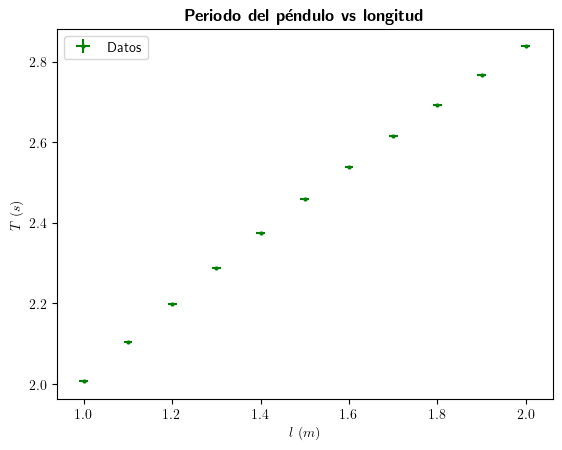

In [5]:
# Cálculos
l, err_l = longitud(datos)
t_prom, err_t = t_promedio(datos)
T, err_T = periodo(t_prom, err_t)

# Graficar los datos
grafica_datos(l, err_l, T, err_T)

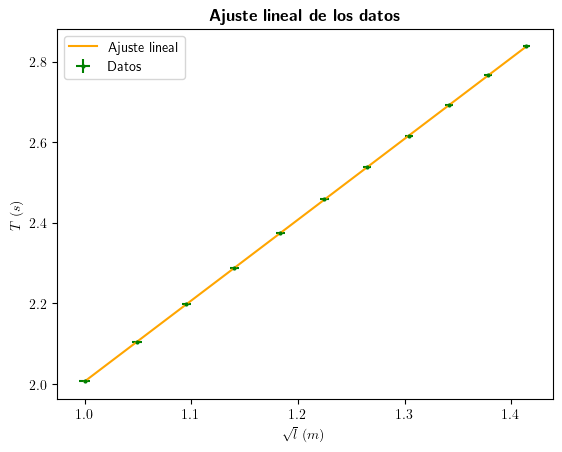

La aceleración de la gravedad es: g = (9.805617 ± 0.001214) m/s²


In [6]:
# Ajustar los datos y calcular g
x=np.sqrt(l)
err_x= err_l/(2*np.sqrt(l))
y=T
err_y = err_T

a, err_a = ajuste_datos(x, y, err_x, err_y)
g_exp = (4*np.pi**2)/a**2
#Cálculo del error de la aceleración de la gravedad experimental, utilizando la fórmula de propagación de 
# errores para medidas indirectas con derviadas parciales
err_g_exp = (8*np.pi**2/a**3)*err_a
print(f"La aceleración de la gravedad es: g = ({g_exp:.6f} ± {err_g_exp:.6f}) m/s²")